In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('Test.csv')
df1 = pd.read_csv('Train.csv')

In [56]:
print(df.shape)
print(df1.shape)

(5681, 11)
(8523, 12)


In [57]:
print(df.columns)
print(df1.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


Looks like when you merge dataframes, it takes all information and adds it together. You only want to merge the one column Id to the dataframe. To do this you can create a new dataframe that only has the item_outlet_sales and the item identifier

In [58]:
df2 = df1[['Item_Identifier', 'Item_Outlet_Sales']]

In [59]:
df_merge = pd.merge(df, df2, on='Item_Identifier', how='right')

In [60]:
dup = df_merge[df_merge.duplicated()]

In [61]:
df_merge.drop_duplicates(inplace=True)

In [62]:
print(df_merge[df_merge.duplicated()])

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [63]:
df_merge.shape

(26258, 12)

In [64]:
df_merge.dropna(inplace=True)

In [65]:
df_merge.shape

(14215, 12)

In [66]:
df_merge.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
28051,False,False,False,False,False,False,False,False,False,False,False,False
28058,False,False,False,False,False,False,False,False,False,False,False,False
28061,False,False,False,False,False,False,False,False,False,False,False,False
28065,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
df_merge.reset_index(drop=True, inplace=True)

In [68]:
df_identifier = df_merge['Item_Identifier']

In [69]:
df_identifier.duplicated().sum()

12766

In [70]:
df_merge.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000
mean,12.788693,0.058984,139.629936,1999.189237,2167.634826
std,4.591994,0.043758,61.677499,7.374106,1727.095642
min,4.555000,0.000000,31.990000,1987.000000,33.290000
25%,8.850000,0.025804,92.979100,1997.000000,787.641400
50%,12.600000,0.048900,141.215400,1999.000000,1768.364800
75%,16.700000,0.086065,185.126600,2004.000000,3115.944000
max,21.350000,0.185913,266.588400,2009.000000,13086.964800


In [71]:
df_merge.shape

(14215, 12)

In [72]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14215 non-null  object 
 1   Item_Weight                14215 non-null  float64
 2   Item_Fat_Content           14215 non-null  object 
 3   Item_Visibility            14215 non-null  float64
 4   Item_Type                  14215 non-null  object 
 5   Item_MRP                   14215 non-null  float64
 6   Outlet_Identifier          14215 non-null  object 
 7   Outlet_Establishment_Year  14215 non-null  float64
 8   Outlet_Size                14215 non-null  object 
 9   Outlet_Location_Type       14215 non-null  object 
 10  Outlet_Type                14215 non-null  object 
 11  Item_Outlet_Sales          14215 non-null  float64
dtypes: float64(5), object(7)
memory usage: 1.3+ MB


In [73]:
df_merge.describe(include=[object, np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14215,14215.000000,14215,14215.000000,14215,14215.000000,14215,14215.000000,14215,14215,14215,14215.000000
unique,1449,NaN,5,NaN,16,NaN,5,NaN,3,3,2,NaN
top,FDQ08,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT049,NaN,Medium,Tier 1,Supermarket Type1,NaN
freq,21,NaN,8532,NaN,2006,NaN,2875,NaN,5717,5743,11373,NaN
mean,NaN,12.788693,NaN,0.058984,NaN,139.629936,NaN,1999.189237,NaN,NaN,NaN,2167.634826
std,NaN,4.591994,NaN,0.043758,NaN,61.677499,NaN,7.374106,NaN,NaN,NaN,1727.095642
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1987.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.850000,NaN,0.025804,NaN,92.979100,NaN,1997.000000,NaN,NaN,NaN,787.641400
50%,NaN,12.600000,NaN,0.048900,NaN,141.215400,NaN,1999.000000,NaN,NaN,NaN,1768.364800
75%,NaN,16.700000,NaN,0.086065,NaN,185.126600,NaN,2004.000000,NaN,NaN,NaN,3115.944000


In [74]:
df_merge.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Getting help from previous example @https://www.kaggle.com/code/dhanishahahaha/project-bigmart-outlet-sales-prediction

C:\Users\drewg\AppData\Local\Temp\ipykernel_1256\849359516.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_merge.corr(), annot=True)


<AxesSubplot: >

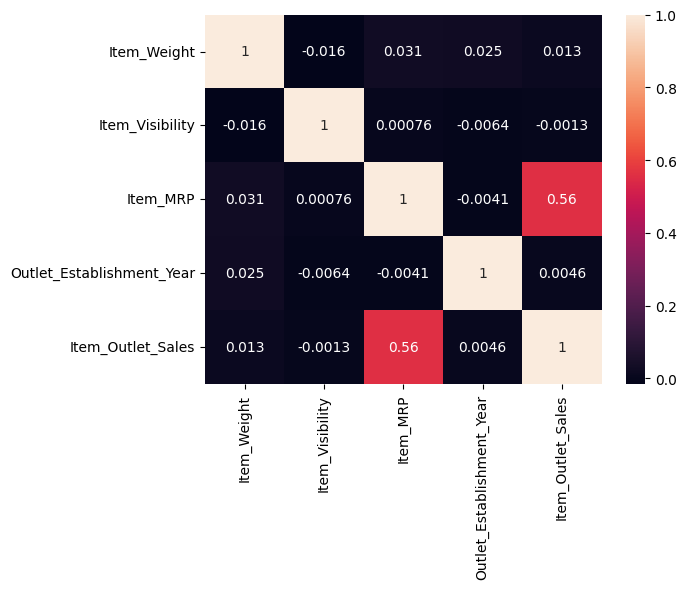

In [75]:
plt.Figure(figsize=(20,5))
sns.heatmap(df_merge.corr(), annot=True)

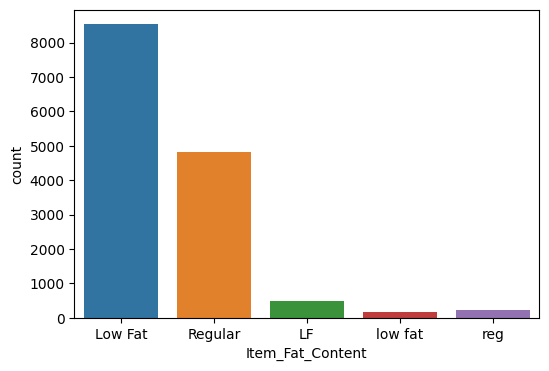

In [76]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_merge, x='Item_Fat_Content')
plt.show()

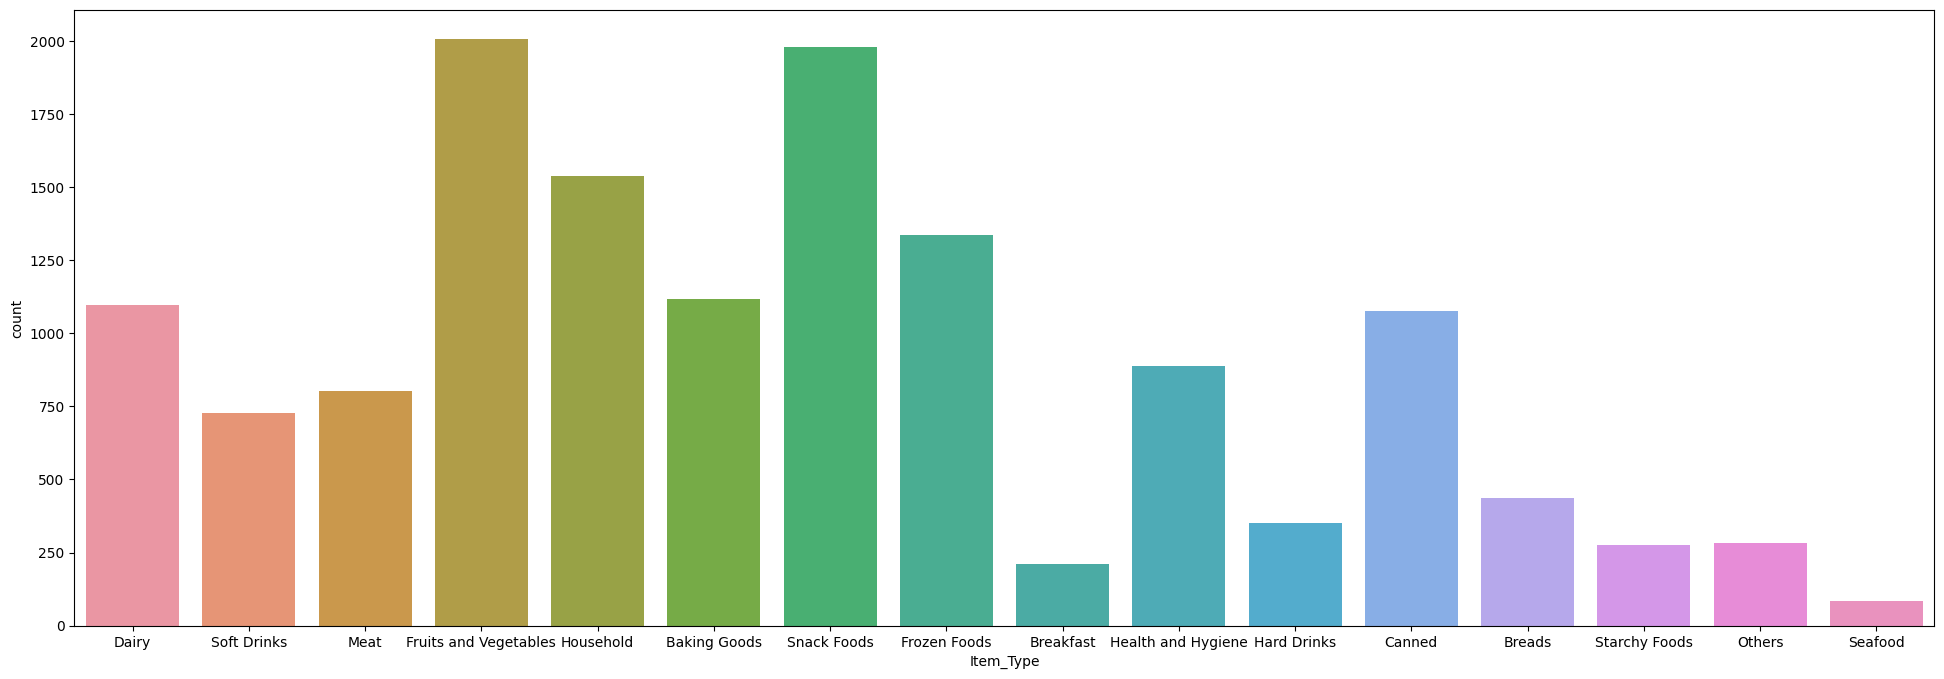

In [77]:
plt.figure(figsize=(24,8))
sns.countplot(data=df_merge, x='Item_Type')
plt.show()

okay so now you want to create the mage loader transformer and exporter , but you have the train and test uploaded on the bucket instead of the df_merge csv. You need to figure out how to create a csv file from dataframe, export that one into the bucket, then use that one for the mage interface. THEN need to set up the mage interface so it can interact with the google cloud storage, create the transformation code(you are doing it all here for now, i dont know how you would use 2 files within the mage data loader without causing issues , at the moment), and finally the exporter. Then we need to upload the transformed files into google bigquery for some sql analysis. Then once you are ready you can upload the data from the bigquery into looker studio to create a final dashboard. Then you are done! goodluck figuring out the sql queries and the dashboard interface cause we both know its going to be a pain the rear. 

In [78]:
df_merge.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [79]:
df_merge['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [80]:
df_breakfast = df_merge.loc[df_merge['Item_Type']=='Breakfast']
df_meat = df_merge.loc[df_merge['Item_Type']=='Meat']
df_snack = df_merge.loc[df_merge['Item_Type']=='Snack Foods']
df_frozen = df_merge.loc[df_merge['Item_Type']=='Frozen Foods']

In [81]:
df_breakfast.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,212.000000,212.000000,212.000000,212.000000,212.000000
mean,13.240566,0.075957,145.271848,1999.882075,2059.350806
std,5.117973,0.047224,51.160231,6.910412,1790.475563
min,6.425000,0.000000,41.848000,1987.000000,39.948000
25%,8.686250,0.039383,102.533200,1997.000000,704.582850
50%,11.600000,0.063273,156.463000,1999.000000,1561.966800
75%,18.600000,0.125120,174.837000,2004.000000,2865.436750
max,21.100000,0.157471,234.030000,2009.000000,8209.314000


In [82]:
df_meat.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,804.000000,804.000000,804.000000,804.000000,804.000000
mean,12.836325,0.051642,137.502194,1998.968905,2131.512326
std,4.585822,0.045156,59.072866,7.517039,1757.592440
min,5.150000,0.000000,36.353200,1987.000000,47.937600
25%,9.300000,0.017579,98.804200,1997.000000,756.348800
50%,12.350000,0.036883,134.294200,1999.000000,1774.024100
75%,16.750000,0.078332,183.295000,2004.000000,2929.520000
max,21.250000,0.179044,261.493600,2009.000000,9390.443200


In [83]:
df_snack.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,12.892318,0.060550,145.725206,1998.980808,2278.227715
std,4.455271,0.043272,60.456862,7.451554,1737.915250
min,5.095000,0.000000,32.755800,1987.000000,33.955800
25%,9.195000,0.028033,104.562200,1997.000000,852.224000
50%,12.850000,0.047850,147.941800,1999.000000,1932.484500
75%,16.850000,0.089919,187.158200,2004.000000,3271.741200
max,21.250000,0.174188,263.691000,2009.000000,10993.689600


In [84]:
df_frozen.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,12.430580,0.058959,132.906095,1999.405689,2075.890644
std,4.444487,0.042125,64.986411,7.450517,1743.002051
min,4.555000,0.000000,33.455800,1987.000000,36.619000
25%,8.895000,0.026532,79.961800,1997.000000,792.302000
50%,12.450000,0.049481,126.104600,1999.000000,1627.881000
75%,16.200000,0.086646,187.389800,2004.000000,3058.518750
max,20.850000,0.168453,263.091000,2009.000000,9275.925600


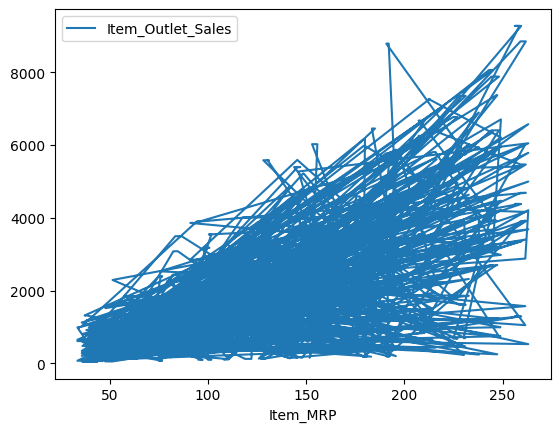

In [85]:
df_frozen.plot(x='Item_MRP', y='Item_Outlet_Sales')
plt.show()

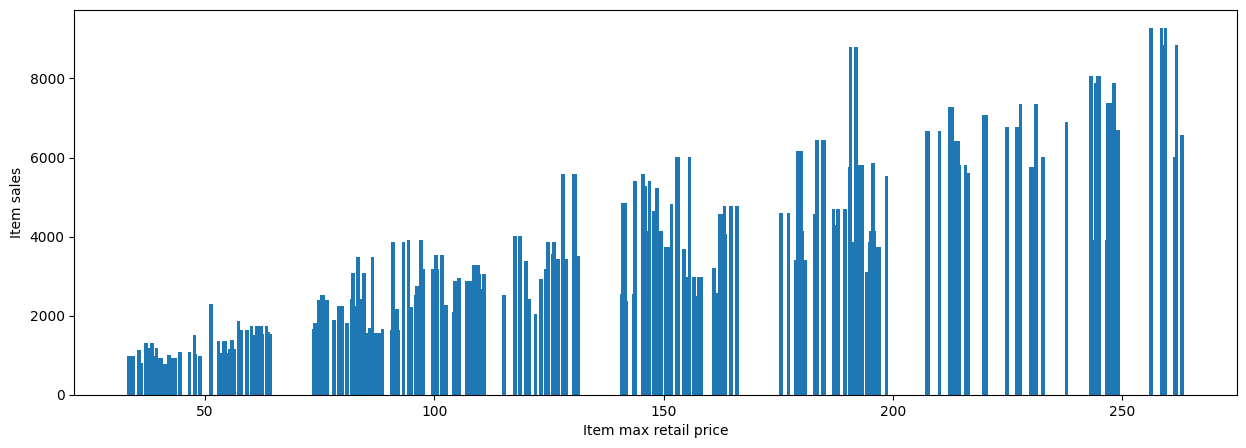

In [86]:
fig = plt.figure(figsize=(15,5))
plt.bar(df_frozen['Item_MRP'], df_frozen['Item_Outlet_Sales'])
plt.xlabel('Item max retail price')
plt.ylabel('Item sales')
plt.show()

In [87]:
df_merge.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [88]:
df_merge['Item_Type'].value_counts()

Fruits and Vegetables    2006
Snack Foods              1980
Household                1537
Frozen Foods             1336
Baking Goods             1118
Dairy                    1098
Canned                   1075
Health and Hygiene        888
Meat                      804
Soft Drinks               729
Breads                    438
Hard Drinks               351
Others                    283
Starchy Foods             277
Breakfast                 212
Seafood                    83
Name: Item_Type, dtype: int64

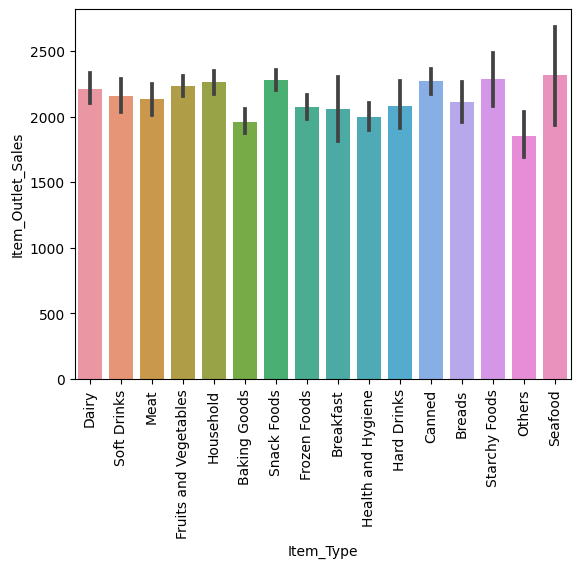

In [89]:
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_merge)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
df_merge['Outlet_Identifier'].value_counts()

OUT049    2875
OUT046    2868
OUT018    2842
OUT013    2832
OUT035    2798
Name: Outlet_Identifier, dtype: int64

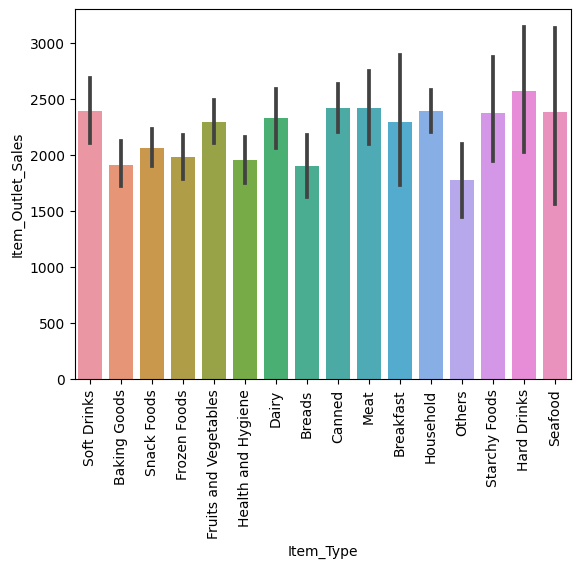

In [91]:
#This is how you can view the item type by total sales from specific outlet
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_merge[df_merge['Outlet_Identifier']=='OUT049'])
plt.xticks(rotation='vertical')
plt.show()

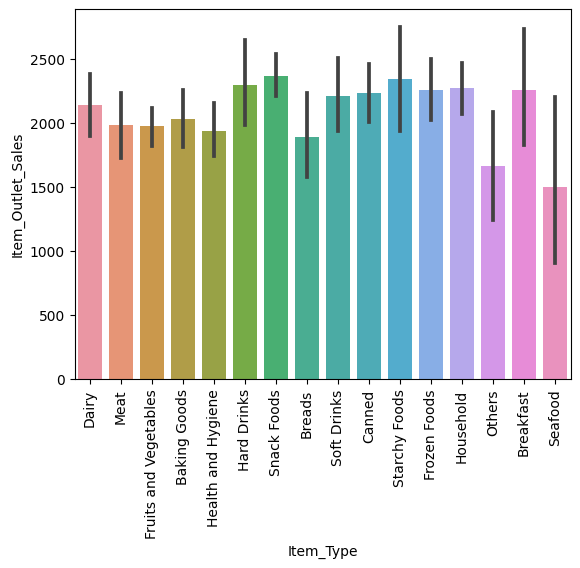

In [92]:
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_merge[df_merge['Outlet_Identifier']=='OUT046'])
plt.xticks(rotation='vertical')
plt.show()

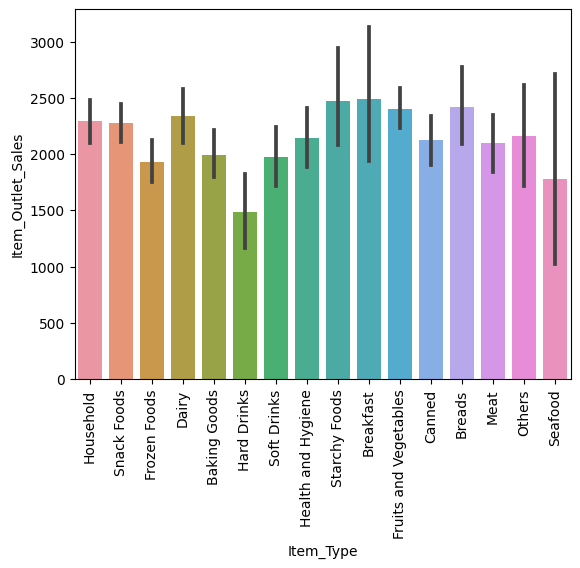

In [93]:
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_merge[df_merge['Outlet_Identifier']=='OUT018'])
plt.xticks(rotation='vertical')
plt.show()

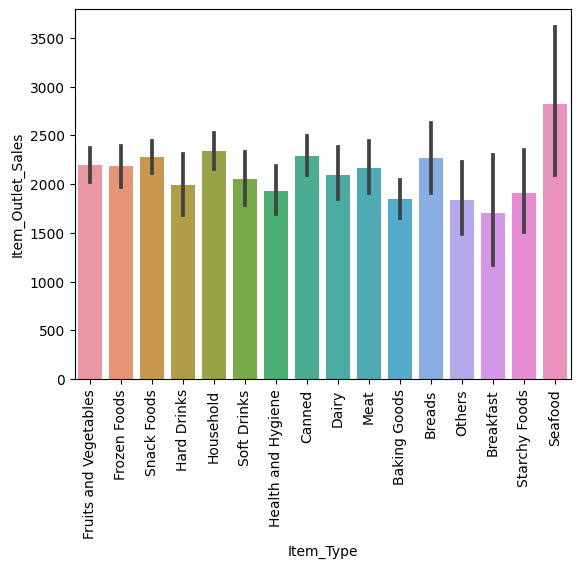

In [94]:
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_merge[df_merge['Outlet_Identifier']=='OUT013'])
plt.xticks(rotation='vertical')
plt.show()

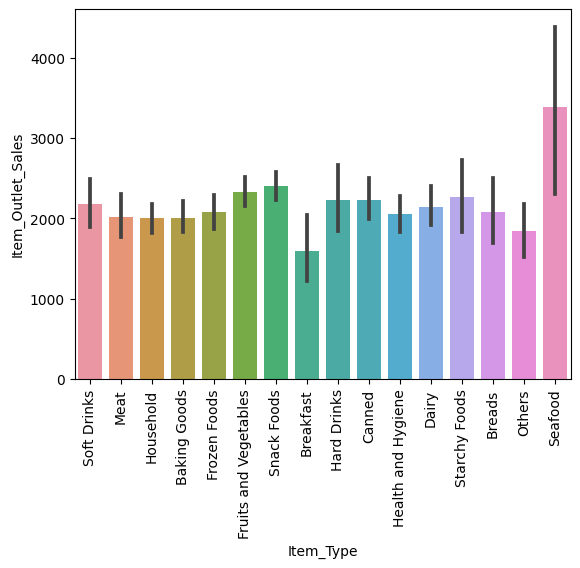

In [95]:
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_merge[df_merge['Outlet_Identifier']=='OUT035'])
plt.xticks(rotation='vertical')
plt.show()

In [131]:
df_out035 = df_merge[df_merge['Outlet_Identifier']=='OUT035']
df_out013 = df_merge[df_merge['Outlet_Identifier']=='OUT013']
df_out018 = df_merge[df_merge['Outlet_Identifier']=='OUT018']
df_out046 = df_merge[df_merge['Outlet_Identifier']=='OUT046']
df_out049 = df_merge[df_merge['Outlet_Identifier']=='OUT049']

In [108]:
df_out035['Outlet_Identifier'].value_counts()

OUT035    2798
Name: Outlet_Identifier, dtype: int64

In [109]:
df_out035.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

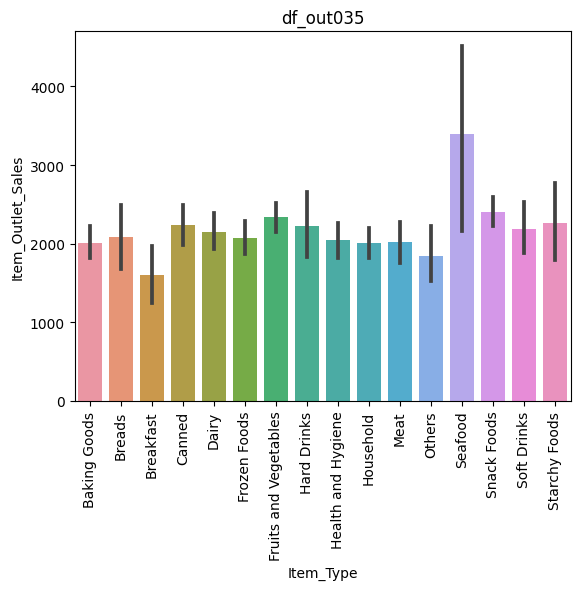

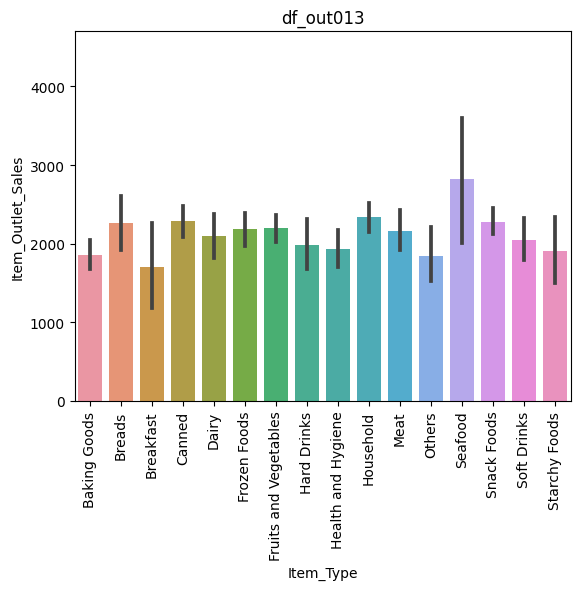

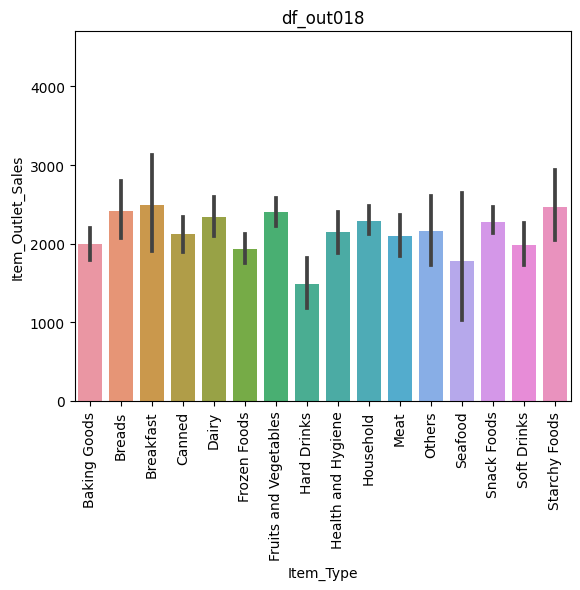

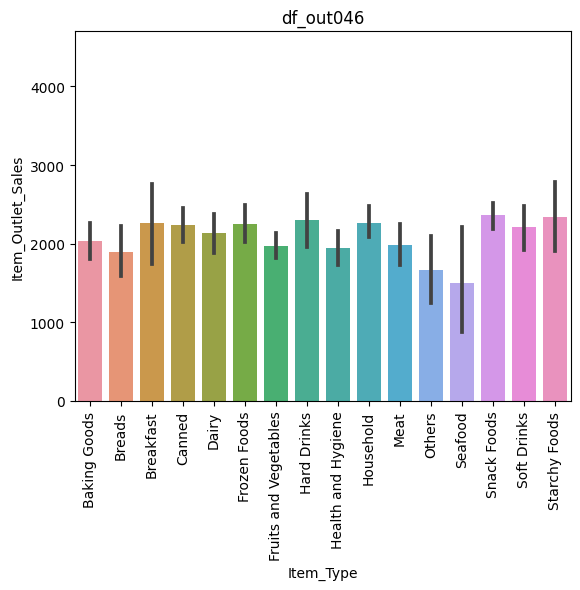

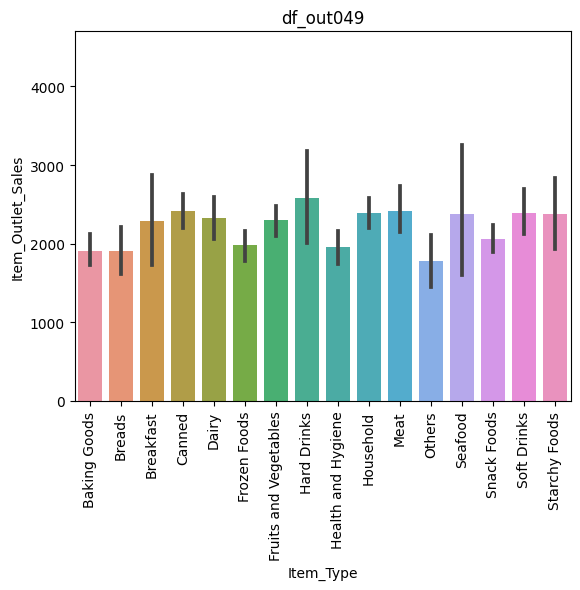

In [173]:
df_list = [df_out035,df_out013,df_out018,df_out046,df_out049]
n = ['df_out035','df_out013','df_out018','df_out046','df_out049']
i=0

for df in df_list:
    df = df.sort_values(by='Item_Type')
    sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df)
    plt.title(n[i])
    plt.xticks(rotation='vertical')
    plt.ylim([0,4700])
    plt.show()
    i = i+1
    

<AxesSubplot: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

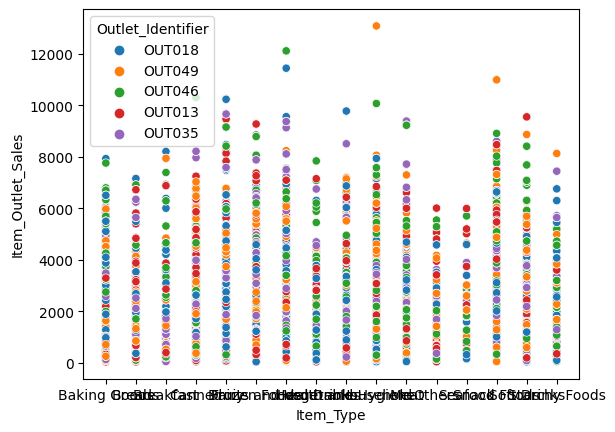

In [184]:
# how about making a scatterplot with the item outlet sales and item type, but you could use hue to go by outlet identifier?

# for df in df_list:
#     df = df.sort_values(by='Item_Type')
#     sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df)
#     plt.title(n[i])
#     plt.xticks(rotation='vertical')
#     plt.ylim([0,4700])
#     plt.show()
#     i = i+1

df = df_merge.sort_values(by='Item_Type')
sns.scatterplot(x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Identifier', data=df)



In [152]:
# the graphs x label isnt all the same, is this because you didnt order them yourself OR do the stores carry different types of products?
# find a way to selecing item type to see if they all have the same item type
holding_types = df_list[0]['Item_Type'].unique()
holding_types

array(['Soft Drinks', 'Meat', 'Household', 'Baking Goods', 'Frozen Foods',
       'Fruits and Vegetables', 'Snack Foods', 'Breakfast', 'Hard Drinks',
       'Canned', 'Health and Hygiene', 'Dairy', 'Starchy Foods', 'Breads',
       'Others', 'Seafood'], dtype=object)

In [165]:
for df in df_list:
    if all(df['Item_Type'].unique() == holding_types):
        print('true')
        

true


In [143]:
holding_columns = df_list[0].columns
for df in df_list:
    if all(df.columns == holding_columns):
        print('true')

true
true
true
true
true


In [181]:
df_out035[df_out035['Item_Type']=='Seafood'].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,10.000000,10.000000,10.000000,10.0,10.000000
mean,18.710000,0.139489,186.698200,2004.0,3388.589100
std,1.755752,0.008758,45.434226,0.0,1900.862207
min,17.350000,0.129313,151.505000,2004.0,149.805000
25%,17.350000,0.129313,151.505000,2004.0,2284.526250
50%,17.350000,0.146272,151.505000,2004.0,3190.846500
75%,20.750000,0.146272,239.488000,2004.0,4748.818500
max,20.750000,0.146272,239.488000,2004.0,5992.200000


In [125]:
df_out035[df_out035['Item_Type']=='Seafood']['Item_Identifier'].unique()

array(['FDG21', 'FDI09'], dtype=object)

In [ ]:
#Now it would be interesting to plot these 2 and see how much each of them are contributing to total sales. Also, to compare other outlets now and see if they have the same products or different products. to see how much of each they are selling
#the item visibility, price comparision, item mrp, and so on to see if you can find the differences between the total sales of seafood products between the different outlets to give insights onto why things are performing the way they are , and how
# you could go about improving seafood sales at other stores. 

In [126]:
# why dont you make seperate variables to use for the plotting?
x = df_out035[df_out035['Item_Type']=='Seafood']['Item_Identifier']
y = df_out035[df_out035['Item_Type']=='Seafood']['Item_Outlet_Sales']

<AxesSubplot: xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

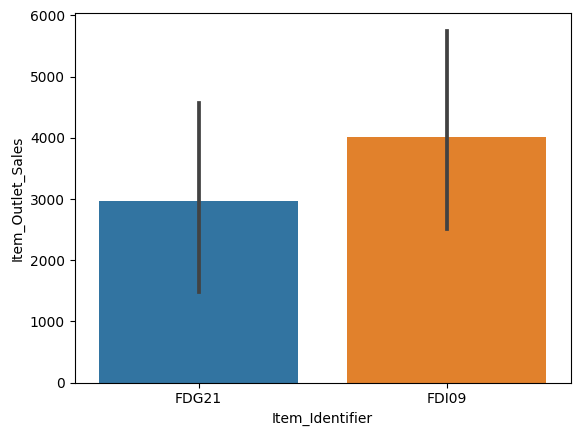

In [129]:
sns.barplot(x=x, y=y)

In [ ]:
sns.scatterplot(x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Identifier', data=df)